In [1]:
%load_ext autoreload
%aimport -numpy -cv2 -torch -matplotlib -matplotlib.pyplot
%autoreload 2
%config InlineBackend.figure_format = 'jpg'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib
import cv2
import os

from panorama_to_pinhole import *

In [3]:
plt.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (12, 8)

## Load panorama

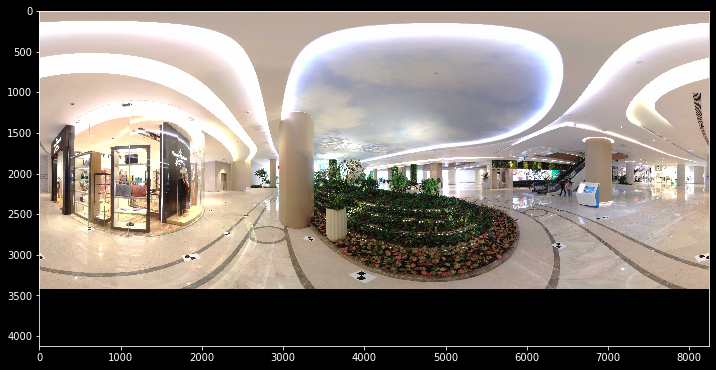

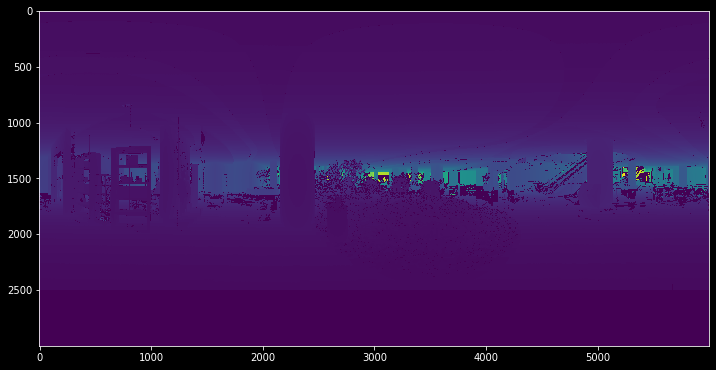

In [5]:
test_image = "pano_1.jpg" 
depth_path = "depth_1.npy"

panorama_depth = np.load(depth_path)
#test_image = "/home/viki/UTOPA/Server_Localization/match_map/winter_garden/panorama/Scan_3_031.jpg"
panorama_img = imageio.imread(test_image)[:, :, :3]
panorama_sampler = panorama_to_sampler(panorama_img)
plt.figure()
plt.imshow(panorama_img)
plt.figure()
plt.imshow(panorama_depth)

## Full pipeline function

In [30]:
save_path = "/home/viki/UTOPA/Server_Localization/match_map/winter_garden/build_test/"

In [12]:
def id_to_str(id_i):
    if id_i < 10:
        return "00"+str(id_i)
    if id_i < 100:
        return "0"+str(id_i)
    else:
        return str(id_i)

In [28]:
def save_images(pano_id, save_path):
    test_image = "/home/viki/UTOPA/Server_Localization/match_map/winter_garden/panorama/Scan_3_"+id_to_str(pano_id)+".jpg"
    if not os.path.isfile(test_image):
        return
    
    panorama_img_raw = imageio.imread(test_image)[:, :, :3]
    panorama_img = np.zeros([int(panorama_img_raw.shape[1]/2), panorama_img_raw.shape[1], 3]).astype(np.uint8)
    panorama_img[0:panorama_img_raw.shape[0],:,:] = panorama_img_raw
    panorama_sampler = panorama_to_sampler(panorama_img)
    
    res = (640, 1000)
    focal = 500
    width = res[0]*480/640
    offset = 50

    count = 30
    for i in range(count):
        angle = 360/count * i
        image_pinhole = panorama_to_pinhole(panorama_sampler, res, focal, [0, angle, 0])
    
        #image_pinhole = panorama_to_pinhole(panorama_sampler, res, focal, [0, angle, 0])
        image_show = image_pinhole[int(res[1]/2-width/2)+offset:int(res[1]/2+width/2)+offset,:,:]
        image_show = cv2.cvtColor(image_show, cv2.COLOR_BGR2RGB)
    
        cv2.imwrite(save_path+str(pano_id)+"_"+str(i)+".jpg",image_show)
        cv2.imshow('pinhole image',image_show)
        cv2.waitKey(10)

In [31]:
for pano_id in range(44):
    save_images(pano_id+1, save_path);
    
cv2.destroyAllWindows()

In [25]:
cv2.destroyAllWindows()